In [55]:
import pandas as pd
from matplotlib import pyplot as plt

In [56]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")
#print(data)

In [57]:
# splitting data into two dataframes by column AB_Cohort
# Разделение данных на два DataFrame по значению столбца "AB_Cohort"
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

# Сохранение двух DataFrame в файлы CSV
data_cohort_A.to_csv("./data_proc/data_cohort_A.csv", index=False)
data_cohort_B.to_csv("./data_proc/data_cohort_B.csv", index=False)

In [58]:
#1.1 Retention and Churn Rate

# Функция для вычисления Retention и Churn Rate
def calculate_retention_churn(data, filter_by_purchase=False):
    # Создаем словарь для хранения Retention и Churn Rate для каждого дня
    retention_dict = {}
    churn_dict = {}

    # Фильтруем данные, оставляя только пользователей с покупками, если необходимо
    if filter_by_purchase:
        data = data[data['CountBuy'] > 0]

    total_users = data['User_id'].nunique()

    # Инициализируем значения для дня 0 (установки)
    retention_dict[0] = 100.0  # 100% удержание в день установки
    churn_dict[0] = 0.0  # 0% отток в день установки

    # Проходим по строкам данных и обновляем Retention и Churn Rate
    for day in range(1, 8):  # Начинаем с первого дня, так как день 0 уже инициализирован
        retained_users = data[data['Retention'] >= day]['User_id'].nunique()

        retention_rate = (retained_users / total_users) * 100
        churn_rate = 100 - retention_rate

        retention_dict[day] = retention_rate
        churn_dict[day] = churn_rate

    # Создаем DataFrame из словарей
    retention_churn_df = pd.DataFrame({'Day': list(retention_dict.keys()),
                                       'Retention Rate (%)': list(retention_dict.values()),
                                       'Churn Rate (%)': list(churn_dict.values())})

    return retention_churn_df

# Вычисляем Retention и Churn Rate для когорты A и B с учетом покупок и без учета
retention_cohort_A_all_df = calculate_retention_churn(data_cohort_A)
retention_cohort_B_all_df = calculate_retention_churn(data_cohort_B)
retention_cohort_A_purchase_df = calculate_retention_churn(data_cohort_A, filter_by_purchase=True)
retention_cohort_B_purchase_df = calculate_retention_churn(data_cohort_B, filter_by_purchase=True)

# Вывести результаты
print("result_cohort_A (All Users):", retention_cohort_A_all_df)
print("result_cohort_B (All Users):", retention_cohort_B_all_df)
print("result_cohort_A (Purchase Users):", retention_cohort_A_purchase_df)
print("result_cohort_B (Purchase Users):", retention_cohort_B_purchase_df)



result_cohort_A (All Users):    Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           52.483901       47.516099
2    2           45.860166       54.139834
3    3           41.835327       58.164673
4    4           37.971481       62.028519
5    5           33.578657       66.421343
6    6           28.449862       71.550138
7    7           22.079117       77.920883
result_cohort_B (All Users):    Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           55.171619       44.828381
2    2           47.385395       52.614605
3    3           42.271366       57.728634
4    4           38.124856       61.875144
5    5           33.471550       66.528450
6    6           28.587883       71.412117
7    7           21.101129       78.898871
result_cohort_A (Purchase Users):    Day  Retention Rate (%)  Churn Rate (%)
0    0               100.0             0.0
1    1                68.0            32.0
2    

In [69]:
%store retention_cohort_A_all_df
%store retention_cohort_B_all_df
%store retention_cohort_A_purchase_df
%store retention_cohort_B_purchase_df

Stored 'retention_cohort_A_all_df' (DataFrame)
Stored 'retention_cohort_B_all_df' (DataFrame)
Stored 'retention_cohort_A_purchase_df' (DataFrame)
Stored 'retention_cohort_B_purchase_df' (DataFrame)


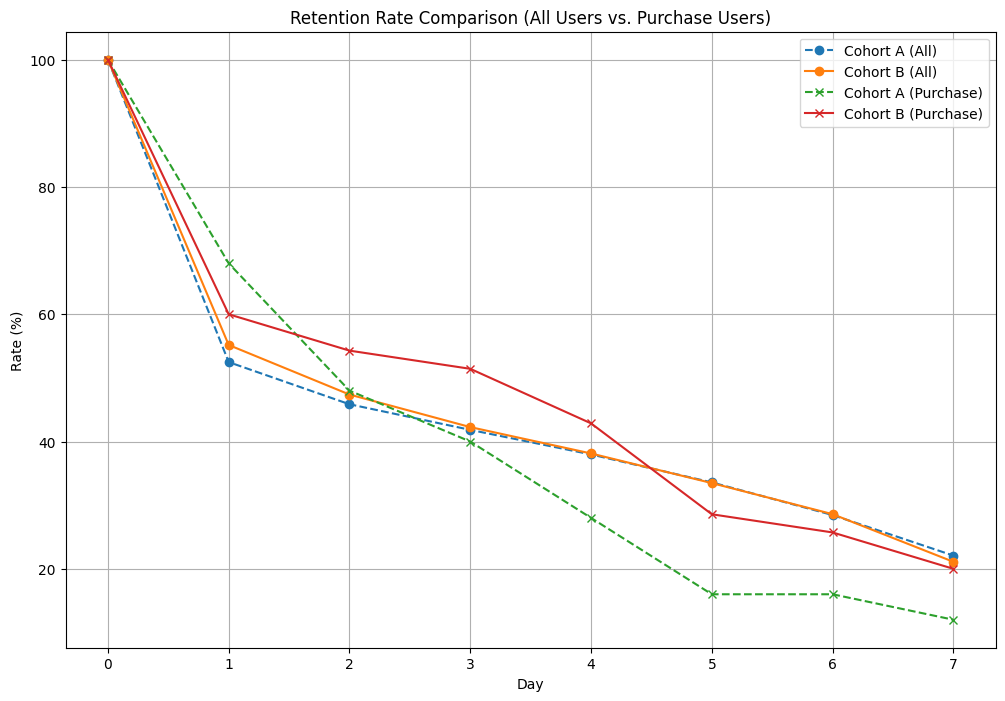

In [59]:
#1.2 Retention graph
# Строим графики для всех пользователей и только для пользователей с покупками
plt.figure(figsize=(12, 8))

# График Retention Rate для всех пользователей
plt.plot(retention_cohort_A_all_df['Day'], retention_cohort_A_all_df['Retention Rate (%)'], label='Cohort A (All)',linestyle='--', marker='o')
plt.plot(retention_cohort_B_all_df['Day'], retention_cohort_B_all_df['Retention Rate (%)'], label='Cohort B (All)', marker='o')

# График Retention Rate только для пользователей с покупками
plt.plot(retention_cohort_A_purchase_df['Day'], retention_cohort_A_purchase_df['Retention Rate (%)'], label='Cohort A (Purchase)', linestyle='--', marker='x')
plt.plot(retention_cohort_B_purchase_df['Day'], retention_cohort_B_purchase_df['Retention Rate (%)'], label='Cohort B (Purchase)', marker='x')

# Настройки графика
plt.title('Retention Rate Comparison (All Users vs. Purchase Users)')
plt.xlabel('Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()



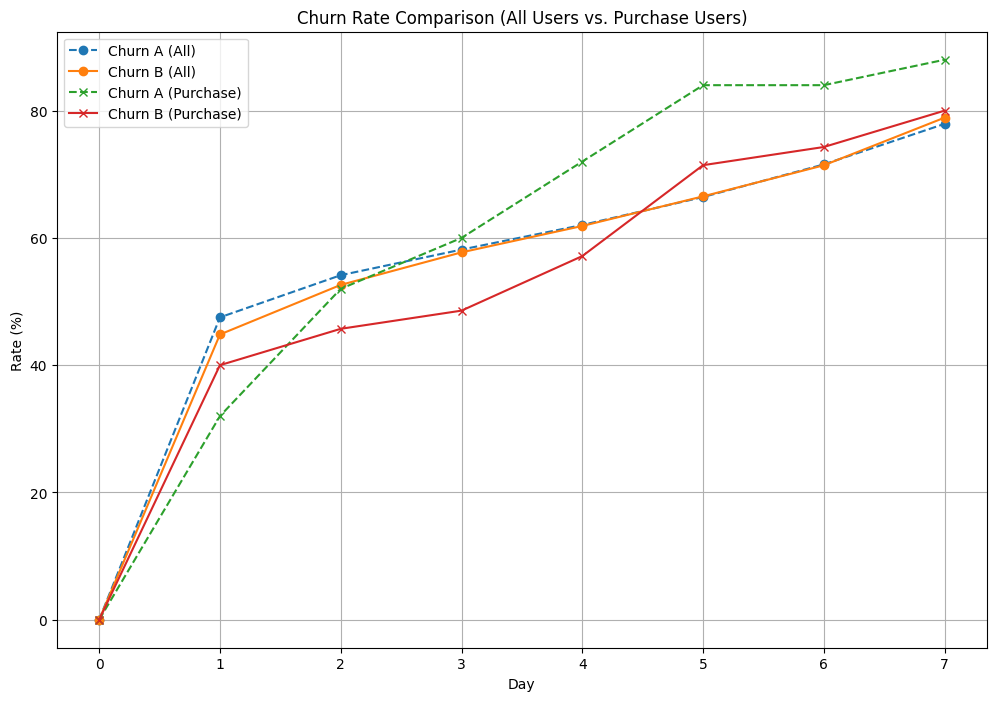

In [60]:
#1.3 Churn Rate graph
# Строим графики для всех пользователей и только для пользователей с покупками для Churn Rate
plt.figure(figsize=(12, 8))

# График Churn Rate для всех пользователей
plt.plot(retention_cohort_A_all_df['Day'], retention_cohort_A_all_df['Churn Rate (%)'], label='Churn A (All)',linestyle='--', marker='o')
plt.plot(retention_cohort_B_all_df['Day'], retention_cohort_B_all_df['Churn Rate (%)'], label='Churn B (All)', marker='o')

# График Churn Rate только для пользователей с покупками
plt.plot(retention_cohort_A_purchase_df['Day'], retention_cohort_A_purchase_df['Churn Rate (%)'], label='Churn A (Purchase)', linestyle='--', marker='x')
plt.plot(retention_cohort_B_purchase_df['Day'], retention_cohort_B_purchase_df['Churn Rate (%)'], label='Churn B (Purchase)', marker='x')

# Настройки графика
plt.title('Churn Rate Comparison (All Users vs. Purchase Users)')
plt.xlabel('Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()


In [61]:
#2.1 Fuuu factor
# Функция для вычисления FUUU по дням и суммарно
def calculate_fuuu(data, filter_by_purchase=False):
    fuuu_overall_by_day = []
    fuuu_clean_by_day = []
    fuuu_overall_sum = 0
    fuuu_clean_sum = 0

    for day in range(8):  # Включая день 0 (установки)
        if day == 0:
            continue  # Пропускаем день 0
        day_data = data[data['Retention'] == day]

        # Фильтруем данные, оставляя только пользователей с покупками, если необходимо
        if filter_by_purchase:
            day_data = day_data[day_data['CountBuy'] > 0]

        count_all_start = day_data['CountAllStart'].sum()
        count_all_finish = day_data['CountAllFinish'].sum()
        count_clean_start = day_data['CountCleanStart'].sum()
        count_clean_finish = day_data['CountCleanFinish'].sum()

        fuuu_overall = count_all_finish / count_all_start if count_all_start > 0 else 0
        fuuu_clean = count_clean_finish / count_clean_start if count_clean_start > 0 else 0

        fuuu_overall_by_day.append(fuuu_overall)
        fuuu_clean_by_day.append(fuuu_clean)

        fuuu_overall_sum += fuuu_overall
        fuuu_clean_sum += fuuu_clean

    return fuuu_overall_by_day, fuuu_clean_by_day, fuuu_overall_sum, fuuu_clean_sum

# Вычисляем FUUU для когорты A по дням и суммарно для всех пользователей и только для пользователей с покупками
fuuu_A_overall_by_day_all, fuuu_A_clean_by_day_all, fuuu_A_overall_sum_all, fuuu_A_clean_sum_all = calculate_fuuu(data_cohort_A)
fuuu_A_overall_by_day_purchase, fuuu_A_clean_by_day_purchase, fuuu_A_overall_sum_purchase, fuuu_A_clean_sum_purchase = calculate_fuuu(data_cohort_A, filter_by_purchase=True)

# Вычисляем FUUU для когорты B по дням и суммарно для всех пользователей и только для пользователей с покупками
fuuu_B_overall_by_day_all, fuuu_B_clean_by_day_all, fuuu_B_overall_sum_all, fuuu_B_clean_sum_all = calculate_fuuu(data_cohort_B)
fuuu_B_overall_by_day_purchase, fuuu_B_clean_by_day_purchase, fuuu_B_overall_sum_purchase, fuuu_B_clean_sum_purchase = calculate_fuuu(data_cohort_B, filter_by_purchase=True)

# Вывод результатов
print("FUUU Overall by Day (Cohort A - All Users):", fuuu_A_overall_by_day_all)
print("FUUU Clean by Day (Cohort A - All Users):", fuuu_A_clean_by_day_all)
print("FUUU Overall Sum (Cohort A - All Users):", fuuu_A_overall_sum_all)
print("FUUU Clean Sum (Cohort A - All Users):", fuuu_A_clean_sum_all)

print("FUUU Overall by Day (Cohort A - Purchase Users):", fuuu_A_overall_by_day_purchase)
print("FUUU Clean by Day (Cohort A - Purchase Users):", fuuu_A_clean_by_day_purchase)
print("FUUU Overall Sum (Cohort A - Purchase Users):", fuuu_A_overall_sum_purchase)
print("FUUU Clean Sum (Cohort A - Purchase Users):", fuuu_A_clean_sum_purchase)

print("FUUU Overall by Day (Cohort B - All Users):", fuuu_B_overall_by_day_all)
print("FUUU Clean by Day (Cohort B - All Users):", fuuu_B_clean_by_day_all)
print("FUUU Overall Sum (Cohort B - All Users):", fuuu_B_overall_sum_all)
print("FUUU Clean Sum (Cohort B - All Users):", fuuu_B_clean_sum_all)

print("FUUU Overall by Day (Cohort B - Purchase Users):", fuuu_B_overall_by_day_purchase)
print("FUUU Clean by Day (Cohort B - Purchase Users):", fuuu_B_clean_by_day_purchase)
print("FUUU Overall Sum (Cohort B - Purchase Users):", fuuu_B_overall_sum_purchase)
print("FUUU Clean Sum (Cohort B - Purchase Users):", fuuu_B_clean_sum_purchase)






FUUU Overall by Day (Cohort A - All Users): [0.3095520513536143, 0.24587643276488677, 0.21601142104107182, 0.19506410256410256, 0.23088483937629156, 0.20397742542327332, 0.18900540717679828]
FUUU Clean by Day (Cohort A - All Users): [0.28640739015680794, 0.2267602746745926, 0.19865935405240706, 0.1785586743804014, 0.21757407281849617, 0.19071117561683598, 0.17220381481149816]
FUUU Overall Sum (Cohort A - All Users): 1.590371679700039
FUUU Clean Sum (Cohort A - All Users): 1.4708747565110394
FUUU Overall by Day (Cohort A - Purchase Users): [0.23660714285714285, 0.20851063829787234, 0.21379310344827587, 0.05263157894736842, 0.2631578947368421, 0.22413793103448276, 0.19387755102040816]
FUUU Clean by Day (Cohort A - Purchase Users): [0.20202020202020202, 0.1735159817351598, 0.1487603305785124, 0.029850746268656716, 0.20754716981132076, 0.13333333333333333, 0.15294117647058825]
FUUU Overall Sum (Cohort A - Purchase Users): 1.3927158403423925
FUUU Clean Sum (Cohort A - Purchase Users): 1.047

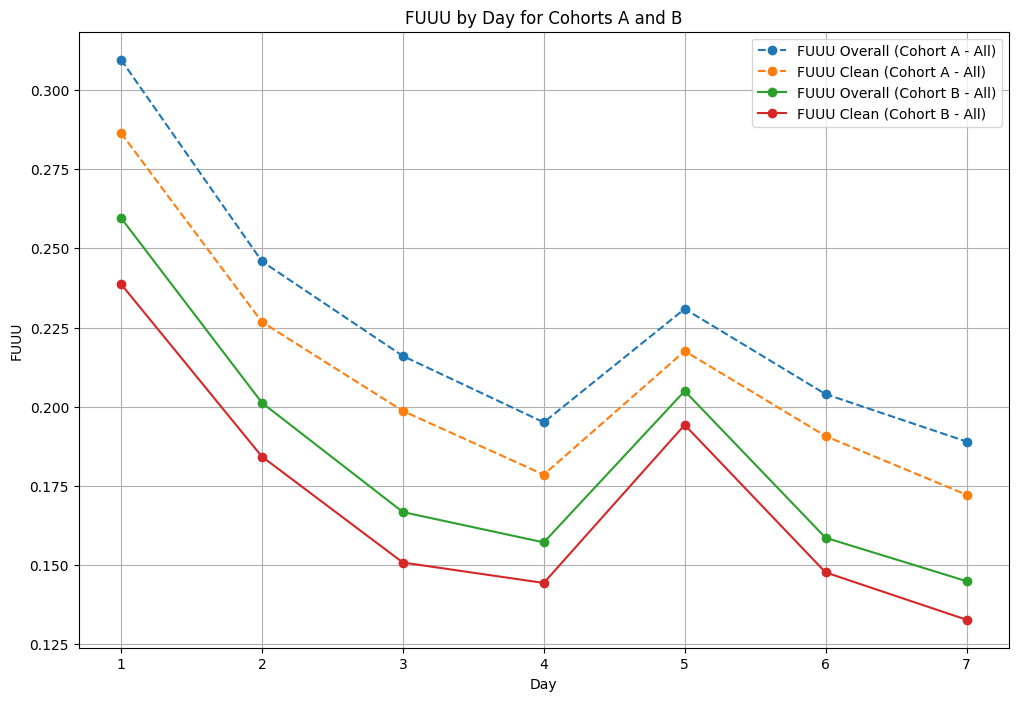

In [62]:
#2.2 Fuuu factor graph for all player
# Строим графики изменения FUUU по дням для когорт A и B для всех пользователей и пользователей с покупками
plt.figure(figsize=(12, 8))
days = range(1, 8)

plt.plot(days, fuuu_A_overall_by_day_all, label='FUUU Overall (Cohort A - All)',linestyle='--', marker='o')
plt.plot(days, fuuu_A_clean_by_day_all, label='FUUU Clean (Cohort A - All)',linestyle='--', marker='o')
plt.plot(days, fuuu_B_overall_by_day_all, label='FUUU Overall (Cohort B - All)', marker='o')
plt.plot(days, fuuu_B_clean_by_day_all, label='FUUU Clean (Cohort B - All)', marker='o')
plt.title('FUUU by Day for Cohorts A and B')
plt.xlabel('Day')
plt.ylabel('FUUU')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

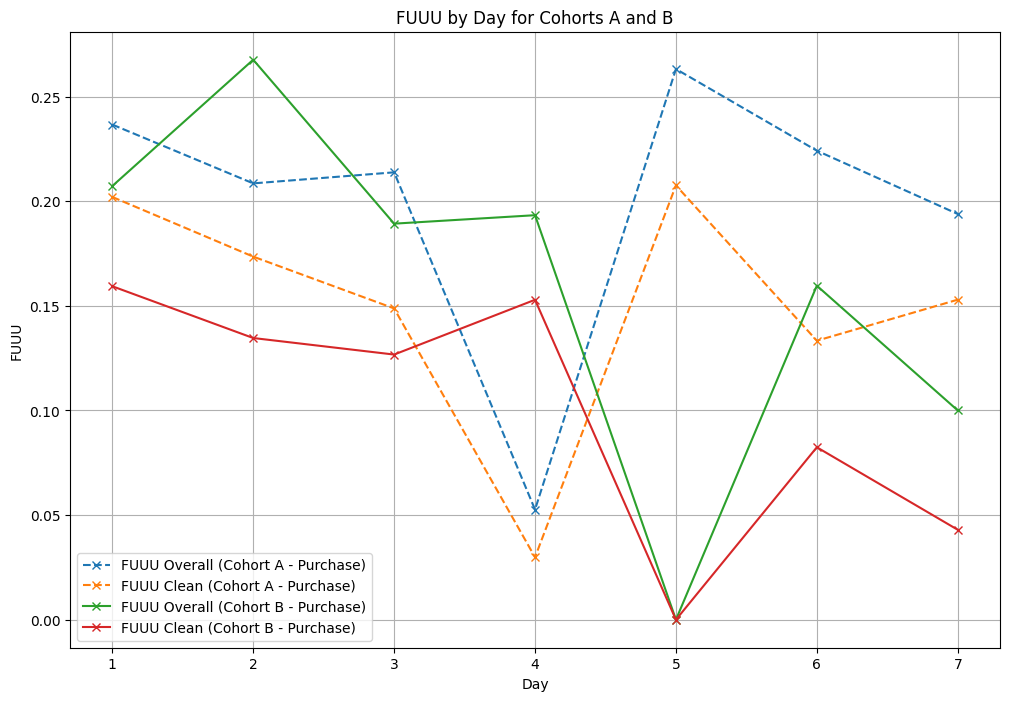

In [63]:
#2.3 Fuuu factor graph for purchase player
# Строим графики изменения FUUU по дням для когорт A и B для всех пользователей и пользователей с покупками
plt.figure(figsize=(12, 8))
days = range(1, 8)

plt.plot(days, fuuu_A_overall_by_day_purchase, label='FUUU Overall (Cohort A - Purchase)',linestyle='--', marker='x')
plt.plot(days, fuuu_A_clean_by_day_purchase, label='FUUU Clean (Cohort A - Purchase)',linestyle='--',marker='x')
plt.plot(days, fuuu_B_overall_by_day_purchase, label='FUUU Overall (Cohort B - Purchase)',  marker='x')
plt.plot(days, fuuu_B_clean_by_day_purchase, label='FUUU Clean (Cohort B - Purchase)',  marker='x')
plt.title('FUUU by Day for Cohorts A and B')
plt.xlabel('Day')
plt.ylabel('FUUU')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()



In [64]:
# Функция для вычисления среднего максимального уровня по дням и суммарно
def calculate_avg_max_level(data, filter_by_purchase=False):
    avg_max_level_by_day = []
    avg_max_level_sum = 0

    for day in range(8):  # Включая день 0 (установки)
        if day == 0:
            continue  # Пропускаем день 0
        day_data = data[data['Retention'] == day]

        # Фильтруем данные, оставляя только пользователей с покупками, если необходимо
        if filter_by_purchase:
            day_data = day_data[day_data['CountBuy'] > 0]

        avg_max_level = day_data['MaxLevelPassed'].mean()

        avg_max_level_by_day.append(avg_max_level)
        avg_max_level_sum += avg_max_level

    return avg_max_level_by_day, avg_max_level_sum

# Вычисляем средний максимальный уровень для когорты A по дням и суммарно для всех пользователей и только для пользователей с покупками
avg_max_level_A_by_day_all, avg_max_level_A_sum_all = calculate_avg_max_level(data_cohort_A)
avg_max_level_A_by_day_purchase, avg_max_level_A_sum_purchase = calculate_avg_max_level(data_cohort_A, filter_by_purchase=True)

# Вычисляем средний максимальный уровень для когорты B по дням и суммарно для всех пользователей и только для пользователей с покупками
avg_max_level_B_by_day_all, avg_max_level_B_sum_all = calculate_avg_max_level(data_cohort_B)
avg_max_level_B_by_day_purchase, avg_max_level_B_sum_purchase = calculate_avg_max_level(data_cohort_B, filter_by_purchase=True)

# Вывод результатов
print("Average Max Level by Day (Cohort A - All Users):", avg_max_level_A_by_day_all)
print("Average Max Level Sum (Cohort A - All Users):", avg_max_level_A_sum_all)

print("Average Max Level by Day (Cohort A - Purchase Users):", avg_max_level_A_by_day_purchase)
print("Average Max Level Sum (Cohort A - Purchase Users):", avg_max_level_A_sum_purchase)

print("Average Max Level by Day (Cohort B - All Users):", avg_max_level_B_by_day_all)
print("Average Max Level Sum (Cohort B - All Users):", avg_max_level_B_sum_all)

print("Average Max Level by Day (Cohort B - Purchase Users):", avg_max_level_B_by_day_purchase)
print("Average Max Level Sum (Cohort B - Purchase Users):", avg_max_level_B_sum_purchase)




Average Max Level by Day (Cohort A - All Users): [34.509981851179674, 40.442622950819676, 43.44946589975349, 45.55247181266262, 47.751633986928105, 50.48300720906282, 51.225]
Average Max Level Sum (Cohort A - All Users): 313.4141837104064
Average Max Level by Day (Cohort A - Purchase Users): [54.0, 68.33333333333333, 81.5, 83.0, 159.0, 97.5, 92.33333333333333]
Average Max Level Sum (Cohort A - Purchase Users): 635.6666666666666
Average Max Level by Day (Cohort B - All Users): [37.99541021227768, 44.20245842371656, 49.14496314496314, 53.289256198347104, 54.6534749034749, 57.67406659939455, 61.22816593886463]
Average Max Level Sum (Cohort B - All Users): 358.1877954210386
Average Max Level by Day (Cohort B - Purchase Users): [54.375, 40.25, 60.0, 59.285714285714285, 40.0, 54.0, 85.71428571428571]
Average Max Level Sum (Cohort B - Purchase Users): 393.625


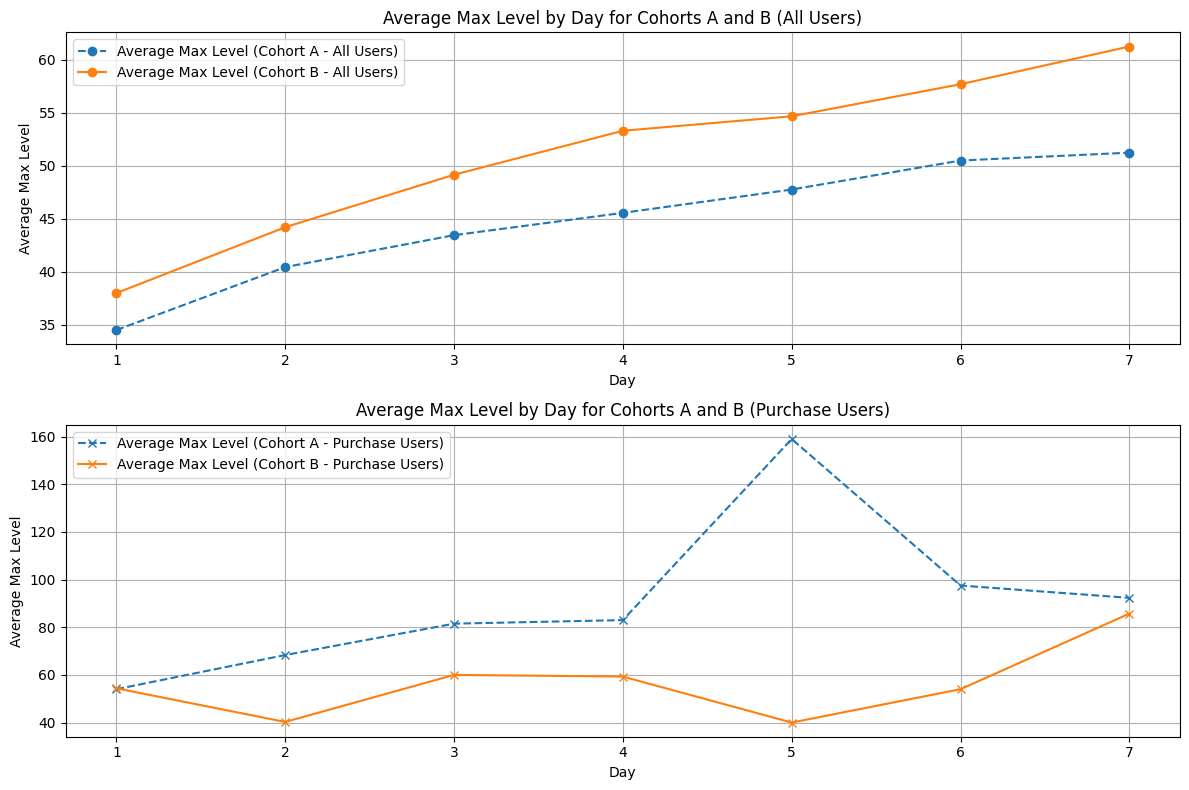

In [65]:
# 3.2 AVG MaxLevelPassed by day graph
# Строим графики изменения среднего максимального уровня по дням для когорт A и B для всех пользователей и пользователей с покупками

plt.figure(figsize=(12, 8))
days = range(1, 8)

# Графики для всех пользователей
plt.subplot(211)
plt.plot(days, avg_max_level_A_by_day_all, label='Average Max Level (Cohort A - All Users)',linestyle='--', marker='o')
plt.plot(days, avg_max_level_B_by_day_all, label='Average Max Level (Cohort B - All Users)', marker='o')

plt.title('Average Max Level by Day for Cohorts A and B (All Users)')
plt.xlabel('Day')
plt.ylabel('Average Max Level')
plt.legend()
plt.grid(True)

# Графики для пользователей с покупками
plt.subplot(212)
plt.plot(days, avg_max_level_A_by_day_purchase, label='Average Max Level (Cohort A - Purchase Users)', linestyle='--', marker='x')
plt.plot(days, avg_max_level_B_by_day_purchase, label='Average Max Level (Cohort B - Purchase Users)',  marker='x')

plt.title('Average Max Level by Day for Cohorts A and B (Purchase Users)')
plt.xlabel('Day')
plt.ylabel('Average Max Level')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Отображение графиков
plt.show()


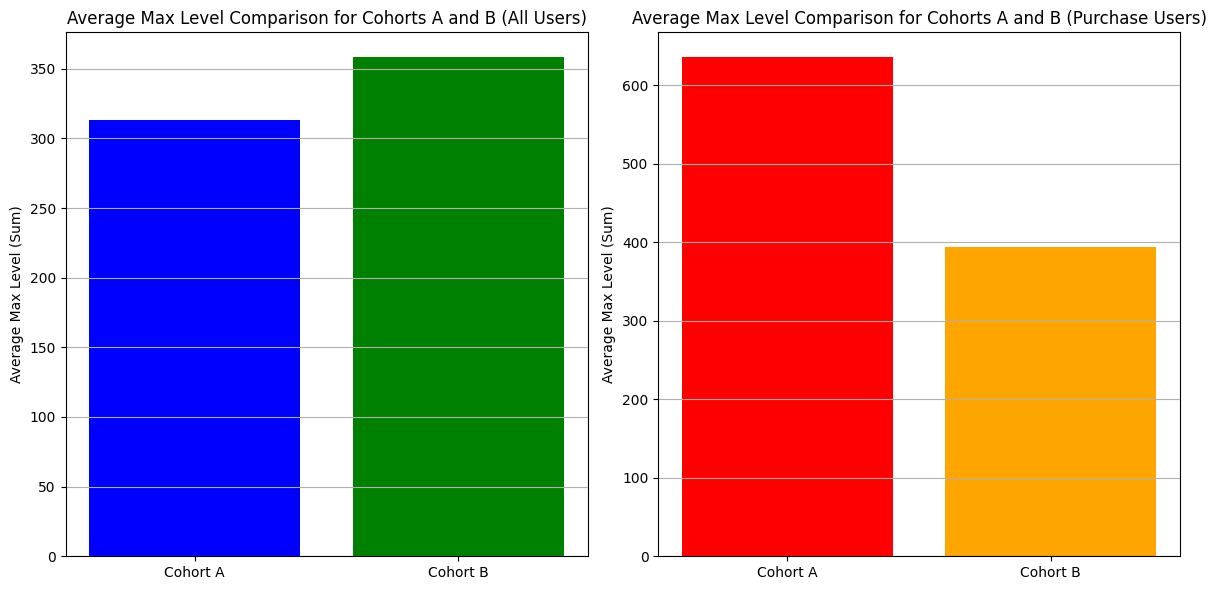

In [66]:
# 3.2 AVG MaxLevelPassed sum graph
# Строим гистограмму сравнения суммарных результатов для когорт A и B
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Создаем список меток и суммарных значений для среднего максимального уровня
cohort_labels = ['Cohort A', 'Cohort B']
avg_max_levels_all_users = [avg_max_level_A_sum_all, avg_max_level_B_sum_all]
avg_max_levels_purchase_users = [avg_max_level_A_sum_purchase, avg_max_level_B_sum_purchase]

# Гистограмма для всех пользователей
plt.subplot(1, 2, 1)
plt.bar(cohort_labels, avg_max_levels_all_users, color=['blue', 'green'])
plt.title('Average Max Level Comparison for Cohorts A and B (All Users)')
plt.ylabel('Average Max Level (Sum)')
plt.grid(axis='y')

# Гистограмма для пользователей с покупками
plt.subplot(1, 2, 2)
plt.bar(cohort_labels, avg_max_levels_purchase_users, color=['red', 'orange'])
plt.title('Average Max Level Comparison for Cohorts A and B (Purchase Users)')
plt.ylabel('Average Max Level (Sum)')
plt.grid(axis='y')

# Отображение гистограмм
plt.tight_layout()
plt.show()


In [67]:
#4.1 AVG amount of gold received by day

# Функция для расчета среднего количества золота
def calculate_avg_gold(data, filter_by_purchase=False):
    if filter_by_purchase:
        data = data[data['CountBuy'] > 0]

    # Группируем данные по когорте и дню, затем вычисляем среднее значение для полей, начинающихся с 'Get_'
    avg_gold_by_cohort_day = data.groupby(['AB_Cohort', 'Retention'])[data.columns[data.columns.str.startswith('Get_')]].mean().reset_index()

    return avg_gold_by_cohort_day

# Вычисляем среднее количество золота для всех пользователей
avg_gold_cohort_A_all_users = calculate_avg_gold(data_cohort_A)
avg_gold_cohort_B_all_users = calculate_avg_gold(data_cohort_B)

# Вычисляем среднее количество золота для пользователей с покупками
avg_gold_cohort_A_purchase_users = calculate_avg_gold(data_cohort_A, filter_by_purchase=True)
avg_gold_cohort_B_purchase_users = calculate_avg_gold(data_cohort_B, filter_by_purchase=True)

# Вывести результаты
print("Average Gold cohort_A (All Users):\n", avg_gold_cohort_A_all_users)
print("Average Gold cohort_B (All Users):\n", avg_gold_cohort_B_all_users)
print("Average Gold cohort_A (Purchase Users):\n", avg_gold_cohort_A_purchase_users)
print("Average Gold cohort_B (Purchase Users):\n", avg_gold_cohort_B_purchase_users)


Average Gold cohort_A (All Users):
   AB_Cohort  Retention    Get_Ads  Get_Chapter    Get_Buy   Get_Faceb  \
0         A          0   4.169562    16.224230  23.835997  121.380588   
1         A          1  14.156080    34.573503  25.710829   37.507562   
2         A          2  11.624441    35.037258  26.788376   11.922504   
3         A          3  12.161052    30.238291   9.860312    9.860312   
4         A          4  12.749350    23.148309  22.549870    6.938422   
5         A          5   8.776844    19.066293  17.086835    5.602241   
6         A          6  10.504634    25.149331  25.231720    6.179197   
7         A          7  10.000000    19.875000  11.458333    6.250000   

   Get_TeamL  Get_TeamT  
0   1.287931  13.643734  
1   2.462190  13.127647  
2   3.614009   6.035768  
3   3.985210   4.272802  
4   3.122290   2.428448  
5   3.426704   2.707750  
6   2.502575   2.162719  
7   2.187500   1.562500  
Average Gold cohort_B (All Users):
   AB_Cohort  Retention    Get_Ads  G

C:\Users\User\AppData\Local\Temp\ipykernel_23452\3058145775.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(cohort_data['Retention'], cohort_data.mean(axis=1), label=cohort_label)
C:\Users\User\AppData\Local\Temp\ipykernel_23452\3058145775.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(cohort_data['Retention'], cohort_data.mean(axis=1), label=cohort_label)


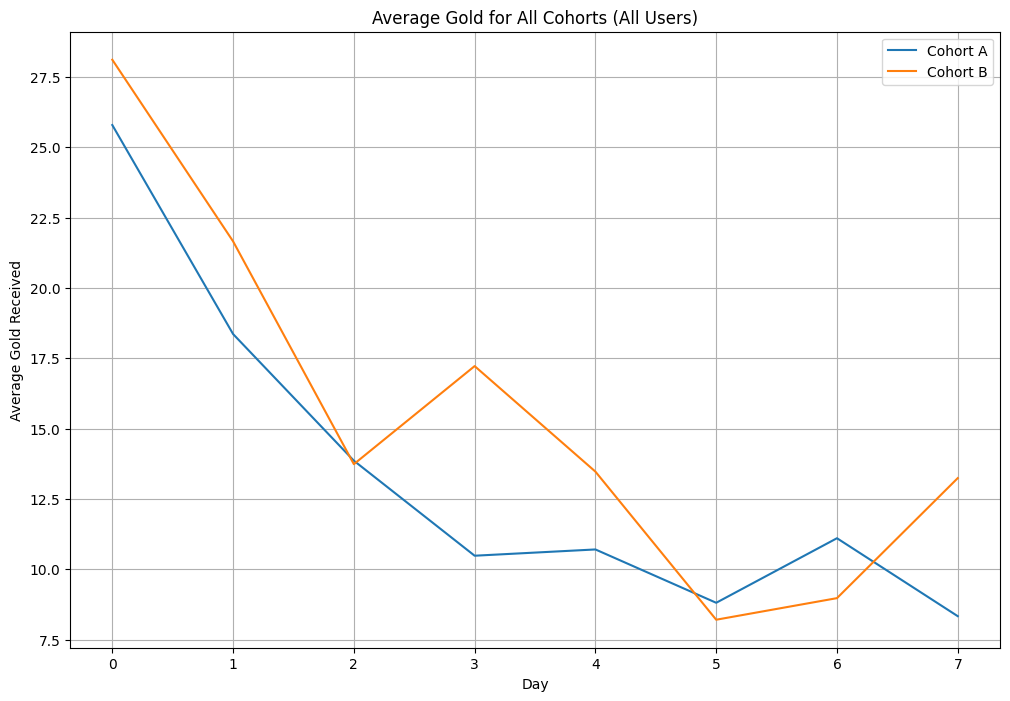

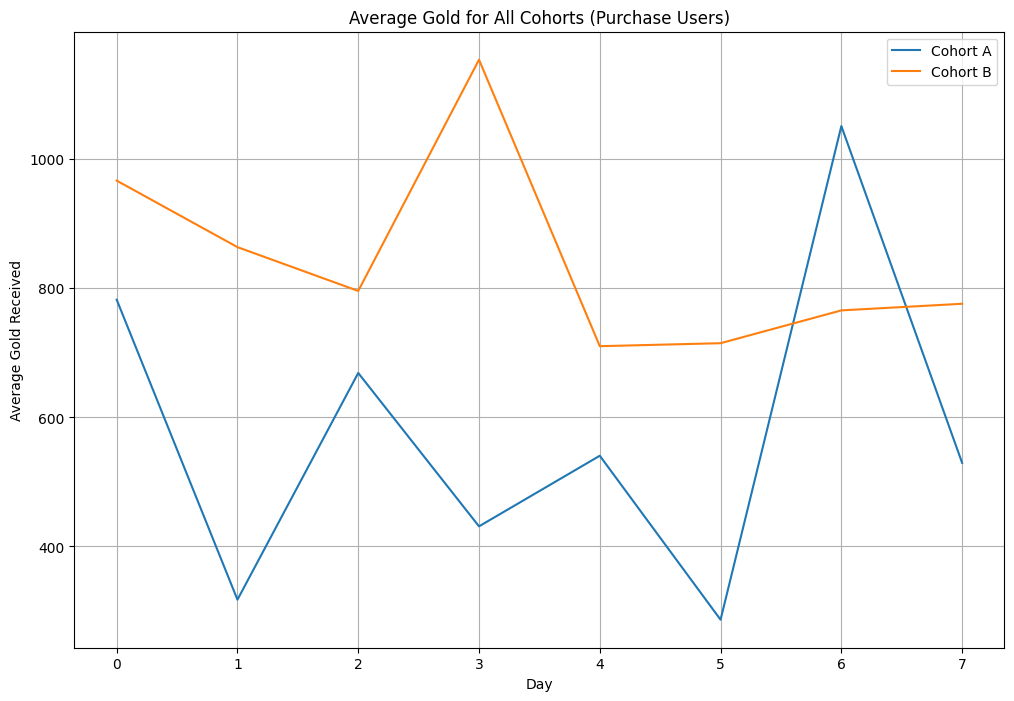

In [68]:
# Создаем функцию для построения графика
def plot_avg_gold(data, title):
    plt.figure(figsize=(12, 8))

    # Итерируемся по каждой когорте
    for cohort, cohort_data in data.groupby('AB_Cohort'):
        cohort_label = f'Cohort {cohort}'
        plt.plot(cohort_data['Retention'], cohort_data.mean(axis=1), label=cohort_label)

    # Настройки графика
    plt.title(title)
    plt.xlabel('Day')
    plt.ylabel('Average Gold Received')
    plt.legend()
    plt.grid(True)

# Объединяем данные по всем когортам
combined_avg_gold_all_users = pd.concat([avg_gold_cohort_A_all_users, avg_gold_cohort_B_all_users], ignore_index=True)
combined_avg_gold_purchase_users = pd.concat([avg_gold_cohort_A_purchase_users, avg_gold_cohort_B_purchase_users], ignore_index=True)

# Постройте графики для всех пользователей на одном графике
plot_avg_gold(combined_avg_gold_all_users, 'Average Gold for All Cohorts (All Users)')

# Постройте графики для пользователей с покупками на одном графике
plot_avg_gold(combined_avg_gold_purchase_users, 'Average Gold for All Cohorts (Purchase Users)')
